# TAIC 2 Incident Report Analysis - Z Swinburne 300560705

The texts in this corpus are the same executive summaries of closed investigations conducted by [TAIC](https://www.taic.org.nz/inquiries?keyword=&mode%5B6%5D=6&status%5B12%5D=12&field_jurisdiction_target_id%5B9%5D=9&occurrence_date%5Bmin%5D=&occurrence_date%5Bmax%5D=&publication_date%5Bmin%5D=&publication_date%5Bmax%5D=), of incidents occuring from 01-07-2008 to present as used in the first program, but organised into categories based on the location the incident affected.

The texts are collected from the TAIC 'Investigations' website section, with filters set to:

Mode: Rail
Status: Closed
Jurisdiction: NZ

The investigation ID is saved as the filename, with the structure

    RO-20XX-1XX
  as
  
    Mode:Rail-Year_Of_Incident-Incident_ID

The summaries can also be found in the .pdf reports on the TAIC site, under the header 'Executive Summary'.

The contents of each summary are copied and saved into a .txt file, and added to the taic-reports folder.

Categories will be locations the incidents occur, taken from the introductory line on each report. For the smaller scale corpus of 76 reports I will tag their location by hand and sort them into location-named folders to be loaded for analysis, but in the larger corpus coverings all 3 eras covered by TAIC reports of 420 reports that is not practical. I'll implement some solution that searches all proper nouns mentioned in the report to best place it in a category, or include the investigation report introduction line:

`RO-2023-104`

`Passenger Train 104 (Te Huia) SPAD and potential conflict, Penrose, Auckland, 17 June 2023`

The location categories are sorted by closeness to locations mapped on
[Railway Lines of New Zealand](https://www.reddit.com/r/newzealand/comments/5e71b7/metro_network_map_of_new_zealand_railway_lines/) - Metro network map of New Zealand Railway Lines by r/NewZealand user u/ph3nx11

This provides a good measure of concentration of incidents across major operational areas, cities, and yards.

There are some cases where incidents are invesitgated alongside similar occurences at the time (eg 2008-06, Upper Hutt incident also looking into an incident in Johnsonville, 2008-07, Auckland-Sylvia Park covering a similar incident in Waitakere), or between 2 locations. In these situations a place them in the region has the most impact on the report, at my discretion. TAIC also provides a handy map for their reports which I normally default to the closest place.

You could consider grouping fringe areas like Auckland's wider suburbs into their categories, but I think that would disingenously represent the activity that happens in different areas in the country.

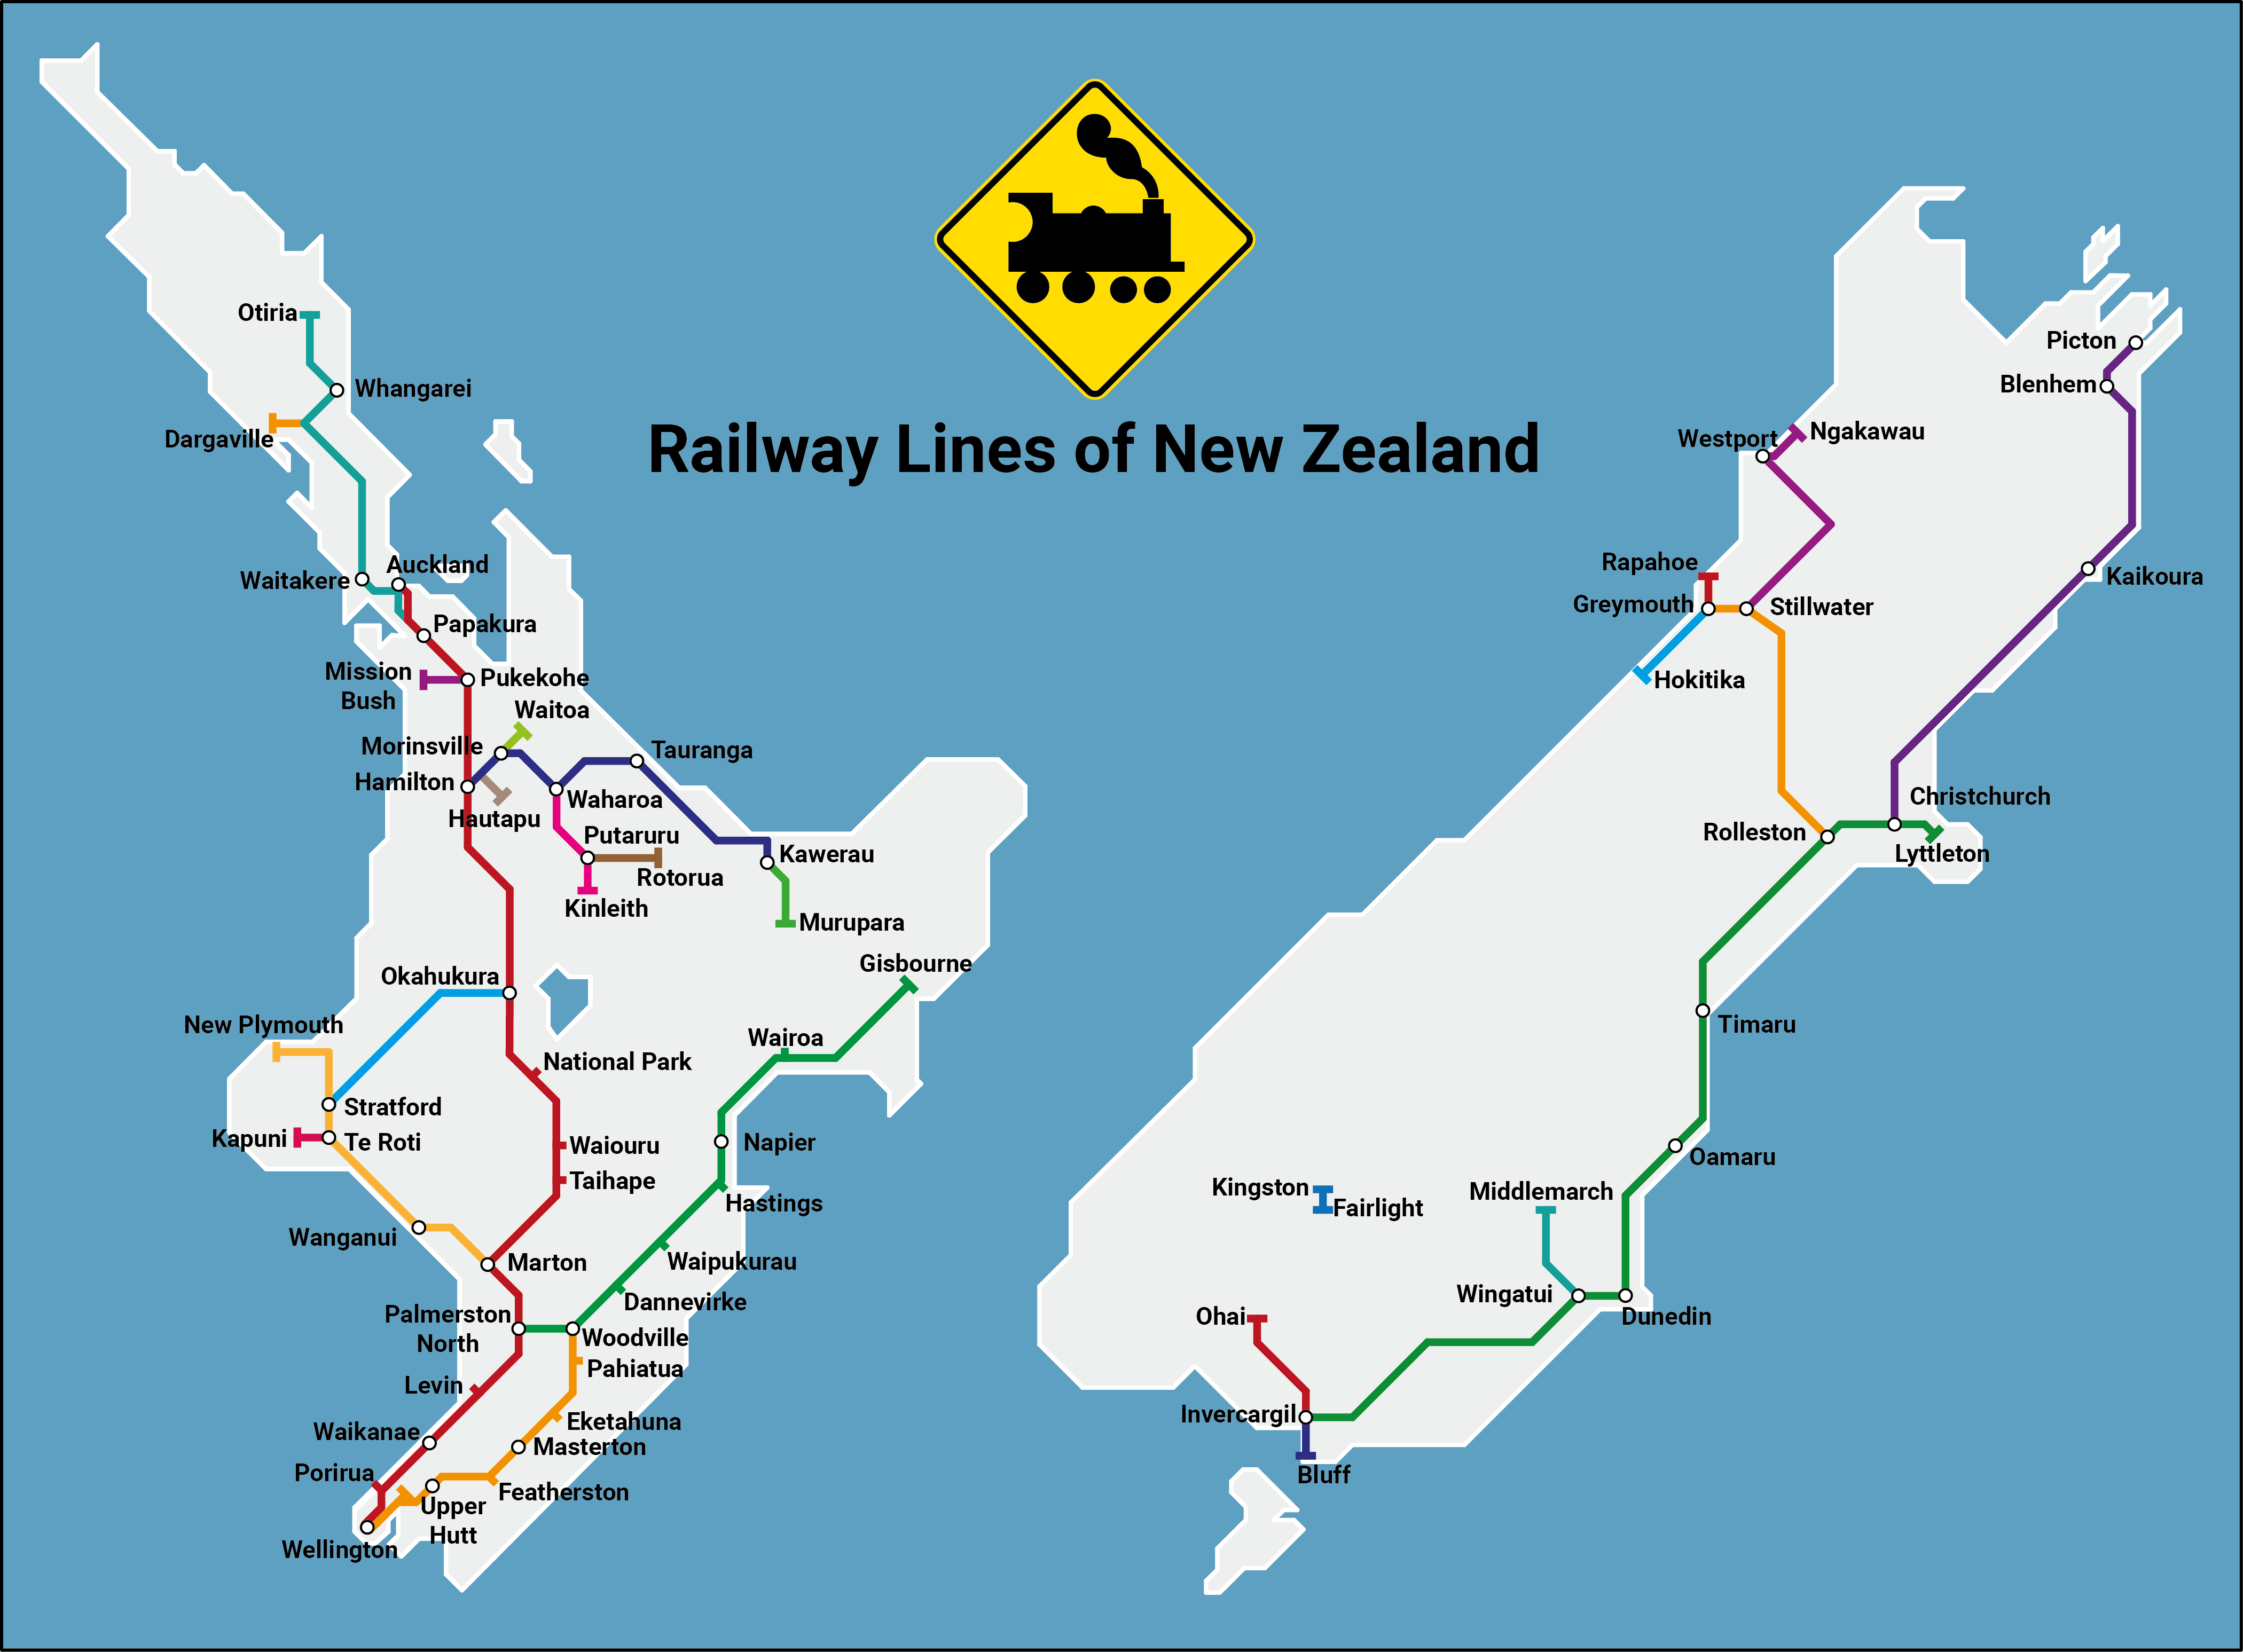

If we wanted to have our list of categories include everything in the map, then we would run  vv
    # North Island Lines, split for readability
    categories = ['Otiria', 'Whangarei', 'Dargaville', 'Waitakere', 'Auckland', 'Papakura', 'Mission Bush', 'Pukekohe', 'Morrinsville', 'Hamilton', 'Hautapu']
    categories += ['Waitoa', 'Waharoa', 'Putaruru', 'Kinleith', 'Rotorua', 'Tauranga', 'Kawerau', 'Murupara']
    categories += ['Okahukura', 'National Park', 'Waiouru', 'Taihape', 'Marton', 'Wanganui', 'Te Roti', 'Kapuni', 'Stratford', 'New Plymouth']
    categories += ['Palmerston North', 'Woodville', 'Dannevirke', 'Waipukurau', 'Hastings', 'Napier', 'Wairoa', 'Gisborne']
    categories += ['Levin', 'Waikanae', 'Porirua', 'Wellington', 'Upper Hutt', 'Featherston', 'Masterton', 'Ekatahuna', 'Pahiatua']

    # South Island Lines, split for readability
    categories = categories + ['Picton', 'Blenheim', 'Kaikoura', 'Christchurch', 'Lyttleton']
    categories = categories + ['Ngakawau', 'Westport', 'Stillwater', 'Greymouth', 'Rapahoe', 'Hokitika']
    categories = categories + ['Rolleston', 'Timaru', 'Oamaru', 'Dunedin', 'Wingatui', 'Middlemarch', 'Invercargill']
    categories = categories + ['Bluff', 'Ohai', 'Fairlight', 'Kingston']
    set(categories)

But our current era of reports only includes incidents from:

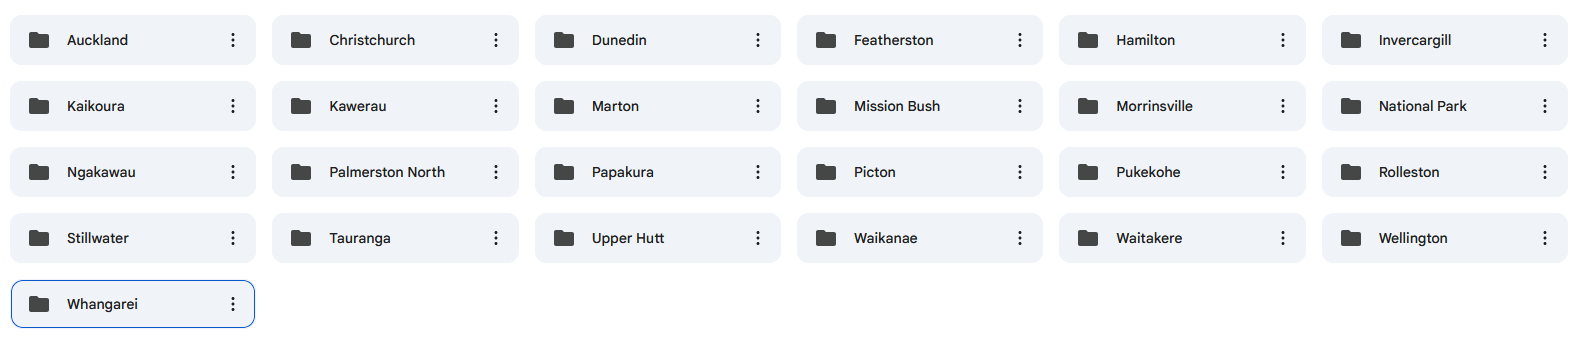

In [ ]:
# North Island Lines, split for readability
categories = ['Whangarei', 'Waitakere', 'Auckland', 'Papakura', 'Mission Bush', 'Pukekohe', 'Morrinsville', 'Hamilton']
categories += ['Tauranga', 'Kawerau', 'National Park', 'Palmerston North', 'Marton', 'Waikanae', 'Wellington', 'Upper Hutt', 'Featherston']

# South Island Lines
categories = categories + ['Picton', 'Kaikoura', 'Christchurch', 'Ngakawau', 'Stillwater', 'Rolleston', 'Dunedin', 'Invercargill']

## Load in Corpus

open taic reports

for location in taic-reports:
- open location folder
- read all reports in folder, process as per P1 (raw and clean)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download(['stopwords', 'punkt_tab', 'averaged_perceptron_tagger_eng', 'tagsets_json', 'treebank', 'universal_tagset', 'book', 'cmudict'])

# On top of NLTK provided stopwords, we will include some headers introduced in recent reports to standardise the format, as well as references to TAIC
# Headers include: "What happened", "Why it happened", "What we can learn", "Who may benefit"
# ['Transport', 'Accident', 'Investigation', 'Commission']

stops = ['what', 'happened', 'why', 'it', 'we', 'can', 'learn', 'who', 'may', 'benefit', 'Transport', 'Accident', 'Investigation', 'Commission']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]   

In [ ]:
# The same method used to load reports in as project 1, but simplified to sort texts into their location categories

import os

filename = "/content/drive/MyDrive/UNIVERSITY/LING229/P2/taic-reports" #replace filepath with path to taic-reports

taic = dict()
corpus = [] # corpus list
rcorpus = [] # raw corpus list
for root, dirs, files in os.walk(filename): #replace filepath with path to taic-reports
  for file in files:
    with open(os.path.join(root, file), 'r') as f:
      key = file[:11] #investigation ID
      text = f.read()
      loc = str(root[58:]) #jank solution, run len(root) and change 58 to start value of location string (I'm so sorry :sob:)
      clean_text = ' '.join([token for token in nltk.word_tokenize(text) if (token.lower() not in stops) and token.isalpha()]) # Clean out stopwords, punctuation and numbers
      taic[loc] = {key: clean_text}

      corpus = ' '.join([clean_text])
      rcorpus = ' '.join([text])

taic

# We've already seen trends across this corpus, so we will calculate that on a case by case basis.

{'Upper Hutt': {'RO_2009_103': 'On the evening of Thursday July the Wellington region was experiencing a storm that brought heavy rain and strong winds At a scheduled commuter train travelling from Wellington to Masterton with approximately passengers and crew in carriages collided with a slip that partially blocked the northern portal of Tunnel on the Wairarapa Line This point was about km north of Upper Hutt station and about km before the Maymorn station The locomotive and generator carriage were embedded in the slip and derailed while the remaining carriages were still on the track but standing within the tunnel Emergency services were called to rescue the passengers and crew The damage to the train was minimal and no injuries were reported The Wairarapa Line was closed for approximately days while the mud was cleared and the track repaired Police assumed management of the accident s rescue phase using the New Zealand Coordinated Incident Management System CIMS and activated a full

## Basic Metrics

for text/category/corpus:
- total tokens
- total types
- ttr -> can we improve on this measure?


- average tokens
- average types
- average ttr

create taic dictionary legend, and helper functions where possible

In [ ]:
# Set the metrics - total tokens and total types - of a dictionary's text

def metrics(dct): #needs to be passed a dict
  tot_tokens = 0
  tot_types = 0

  for key in dct.keys():
    t = dct[key]
    text = ' '.join([token for token in nltk.word_tokenize(t) if (token.lower() not in nltk.corpus.stopwords.words('english'))])
    tokens = len(text.split())  #total tokens (without stopwords)
    types = len(set(text.split()))  #total types (without stopwords)

    tot_tokens += tokens
    tot_types += types

  return [tot_tokens, tot_types]

In [ ]:
# Calculate the lexical diversity of a dictionary's text

def lexical_diversity(metrics): #passed metrics
  return round(metrics[1] / metrics[0], 4) * 100

In [ ]:
# Returns the token and type counts, and lexical diversity of the texts

for key in taic.keys(): #locations
  location = taic[key]

  loc_totals = metrics(location)
  loc_ttr = lexical_diversity(loc_totals)

  print(f'{str(key)} has {loc_totals[0]} tokens and {loc_totals[1]} types, and a lexical diversity of {loc_ttr}%.')

Upper Hutt has 350 tokens and 244 types, and a lexical diversity of 69.71000000000001%.
Auckland has 199 tokens and 124 types, and a lexical diversity of 62.31%.
Ngakawau has 127 tokens and 102 types, and a lexical diversity of 80.31%.
Waitakere has 267 tokens and 140 types, and a lexical diversity of 52.43%.
Pukekohe has 249 tokens and 177 types, and a lexical diversity of 71.08%.
Hamilton has 169 tokens and 110 types, and a lexical diversity of 65.09%.
Rolleston has 147 tokens and 106 types, and a lexical diversity of 72.11%.
Waikanae has 185 tokens and 139 types, and a lexical diversity of 75.14%.
Papakura has 309 tokens and 186 types, and a lexical diversity of 60.19%.
Palmerston North has 148 tokens and 102 types, and a lexical diversity of 68.92%.
Kaikoura has 309 tokens and 173 types, and a lexical diversity of 55.989999999999995%.
Mission Bush has 284 tokens and 158 types, and a lexical diversity of 55.63%.
Wellington has 238 tokens and 139 types, and a lexical diversity of 58.

In [ ]:
# We have already seen the averages for the whole corpus, but just a refresher:

def averages(types, tokens, diversity):
  avg_tok = round((sum(tokens))/(len(tokens)), 2)
  avg_typ = round((sum(types))/(len(types)), 2)
  avg_ttr = round((sum(diversity))/(len(diversity)), 4)

  return [avg_tok, avg_typ, avg_ttr]

In [ ]:
to = []
ty = []
tt = []

for key in taic.keys(): #locations
  location = taic[key]

  loc_totals = metrics(location)
  loc_ttr = lexical_diversity(loc_totals)

  to.append(loc_totals[0])
  ty.append(loc_totals[1])
  tt.append(loc_ttr)

averages(to, ty, tt)

[144.58, 225.33, 65.7875]

## Describe Calculating Lexical Profiles

- Parts of Speech
- Bigrams
- Frequency Distribution

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Let's look at some parts of speech tags

for key in taic.keys(): #locations
  location = taic[key]
  for report in location.keys():
    t = location[report]
    text = ' '.join([token for token in nltk.word_tokenize(t) if (token.lower() not in nltk.corpus.stopwords.words('english'))])

    text_pos = nltk.pos_tag(nltk.word_tokenize(text))

    print([tagged for tagged in text_pos])

[('evening', 'VBG'), ('Thursday', 'NNP'), ('July', 'NNP'), ('Wellington', 'NNP'), ('region', 'NN'), ('experiencing', 'VBG'), ('storm', 'NN'), ('brought', 'VBD'), ('heavy', 'JJ'), ('rain', 'NN'), ('strong', 'JJ'), ('winds', 'NNS'), ('scheduled', 'VBN'), ('commuter', 'NN'), ('train', 'NN'), ('travelling', 'VBG'), ('Wellington', 'NNP'), ('Masterton', 'NNP'), ('approximately', 'RB'), ('passengers', 'VBZ'), ('crew', 'JJ'), ('carriages', 'NNS'), ('collided', 'VBD'), ('slip', 'NN'), ('partially', 'RB'), ('blocked', 'VBD'), ('northern', 'JJ'), ('portal', 'JJ'), ('Tunnel', 'NNP'), ('Wairarapa', 'NNP'), ('Line', 'NNP'), ('point', 'NN'), ('km', 'VBD'), ('north', 'JJ'), ('Upper', 'NNP'), ('Hutt', 'NNP'), ('station', 'NN'), ('km', 'NN'), ('Maymorn', 'NNP'), ('station', 'NN'), ('locomotive', 'JJ'), ('generator', 'NN'), ('carriage', 'NN'), ('embedded', 'VBD'), ('slip', 'NN'), ('derailed', 'VBD'), ('remaining', 'VBG'), ('carriages', 'NNS'), ('still', 'RB'), ('track', 'VBP'), ('standing', 'VBG'), ('wit

In [ ]:
# And bigrams:

for key in taic.keys(): #locations
  location = taic[key]
  for report in location.keys():
    t = location[report]
    text = ' '.join([token for token in nltk.word_tokenize(t) if (token.lower() not in nltk.corpus.stopwords.words('english'))])

    text_pos = nltk.pos_tag(nltk.word_tokenize(text))
    text_bigrams = [bigram for bigram in nltk.bigrams(text_pos)]

    print([text_bigrams])

[[(('evening', 'VBG'), ('Thursday', 'NNP')), (('Thursday', 'NNP'), ('July', 'NNP')), (('July', 'NNP'), ('Wellington', 'NNP')), (('Wellington', 'NNP'), ('region', 'NN')), (('region', 'NN'), ('experiencing', 'VBG')), (('experiencing', 'VBG'), ('storm', 'NN')), (('storm', 'NN'), ('brought', 'VBD')), (('brought', 'VBD'), ('heavy', 'JJ')), (('heavy', 'JJ'), ('rain', 'NN')), (('rain', 'NN'), ('strong', 'JJ')), (('strong', 'JJ'), ('winds', 'NNS')), (('winds', 'NNS'), ('scheduled', 'VBN')), (('scheduled', 'VBN'), ('commuter', 'NN')), (('commuter', 'NN'), ('train', 'NN')), (('train', 'NN'), ('travelling', 'VBG')), (('travelling', 'VBG'), ('Wellington', 'NNP')), (('Wellington', 'NNP'), ('Masterton', 'NNP')), (('Masterton', 'NNP'), ('approximately', 'RB')), (('approximately', 'RB'), ('passengers', 'VBZ')), (('passengers', 'VBZ'), ('crew', 'JJ')), (('crew', 'JJ'), ('carriages', 'NNS')), (('carriages', 'NNS'), ('collided', 'VBD')), (('collided', 'VBD'), ('slip', 'NN')), (('slip', 'NN'), ('partially

[(('train', 'NN'), 5), (('area', 'NN'), 5), (('carriages', 'NNS'), 4), (('passengers', 'NNS'), 4), (('track', 'NN'), 4), (('response', 'NN'), 4), (('control', 'NN'), 4), (('severe', 'JJ'), 4), (('weather', 'NN'), 4), (('Wellington', 'NNP'), 3)]
[(('line', 'NN'), 8), (('Te', 'NNP'), 6), (('Huia', 'NNP'), 6), (('Onehunga', 'NNP'), 5), (('branch', 'NN'), 5), (('junction', 'NN'), 5), (('train', 'NN'), 4), (('Auckland', 'NNP'), 4), (('signal', 'NN'), 4), (('system', 'NN'), 4)]
[(('track', 'NN'), 4), (('warrant', 'NN'), 4), (('engineer', 'NN'), 4), (('locomotive', 'JJ'), 3), (('Commission', 'NNP'), 3), (('coal', 'NN'), 2), (('investigation', 'NN'), 2), (('vulnerable', 'JJ'), 2), (('system', 'NN'), 2), (('overruns', 'VBZ'), 2)]
[(('Fruitvale', 'NNP'), 10), (('Road', 'NNP'), 10), (('crossing', 'VBG'), 10), (('level', 'NN'), 9), (('train', 'NN'), 6), (('Train', 'NNP'), 5), (('line', 'NN'), 5), (('Station', 'NNP'), 5), (('platform', 'NN'), 5), (('passenger', 'NN'), 4)]
[(('train', 'NN'), 9), (('

<ipython-input-193-405118f70294>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10, 5))


[(('level', 'NN'), 11), (('crossing', 'VBG'), 6), (('road', 'NN'), 5), (('signals', 'NNS'), 5), (('staff', 'NN'), 5), (('fault', 'NN'), 4), (('crossing', 'NN'), 4), (('alarms', 'NNS'), 4), (('traffic', 'NN'), 4), (('Selwyn', 'NNP'), 4)]
[(('truck', 'NN'), 9), (('train', 'NN'), 8), (('level', 'NN'), 7), (('crossing', 'VBG'), 7), (('road', 'NN'), 6), (('crossings', 'NNS'), 4), (('trailer', 'NN'), 3), (('Road', 'NNP'), 3), (('refuge', 'NN'), 3), (('wagon', 'NN'), 3)]


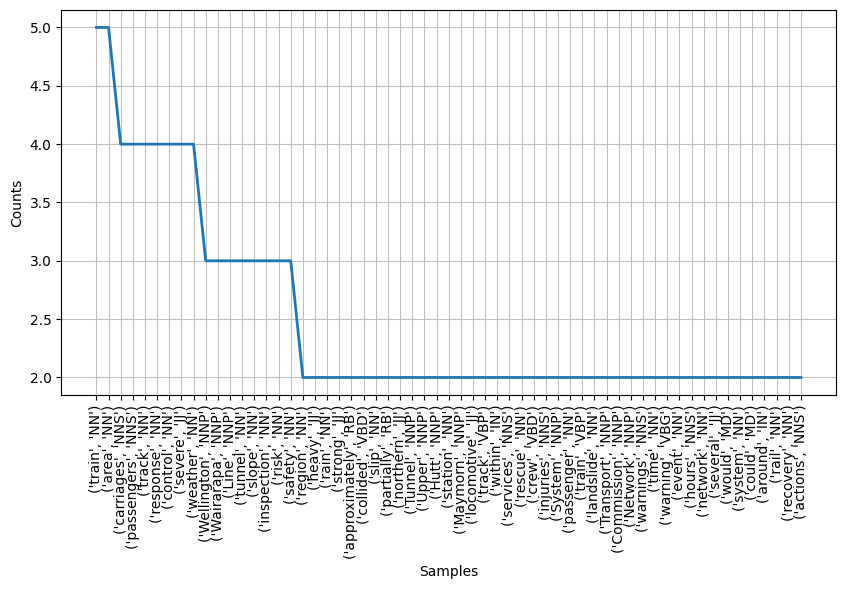

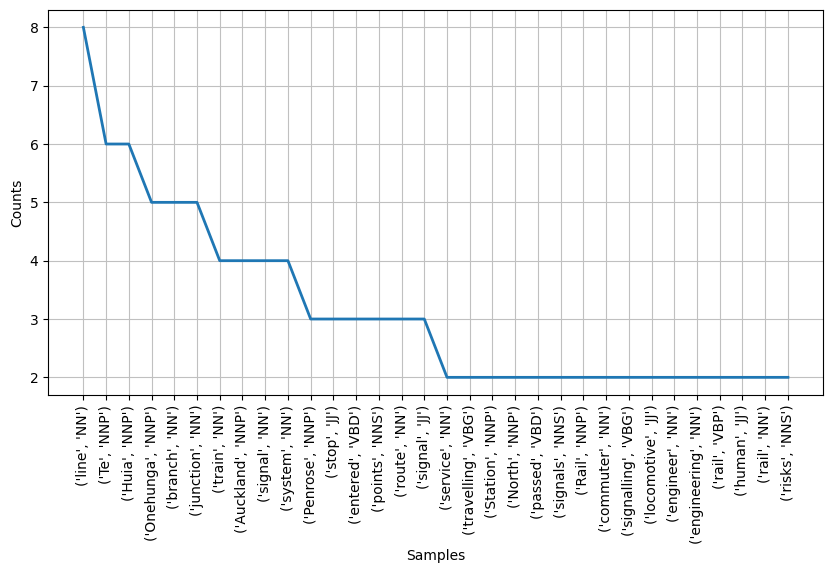

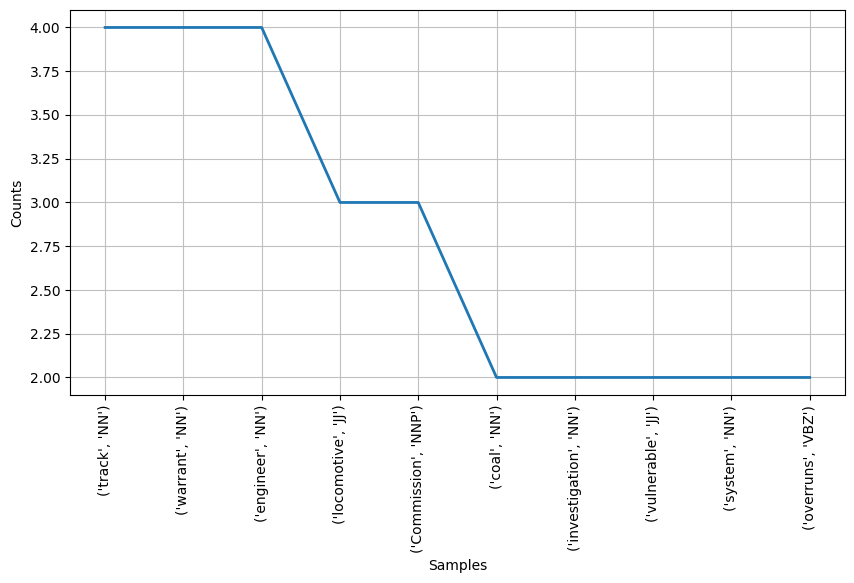

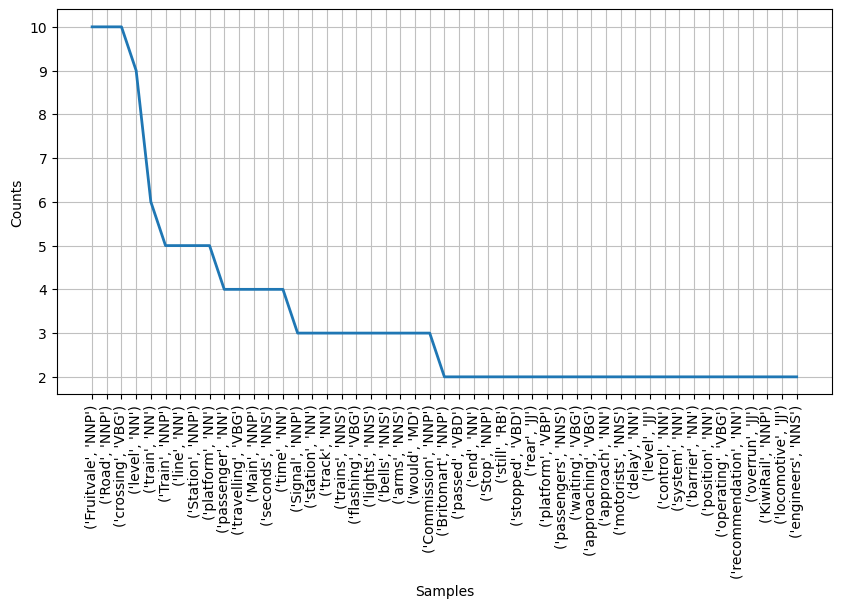

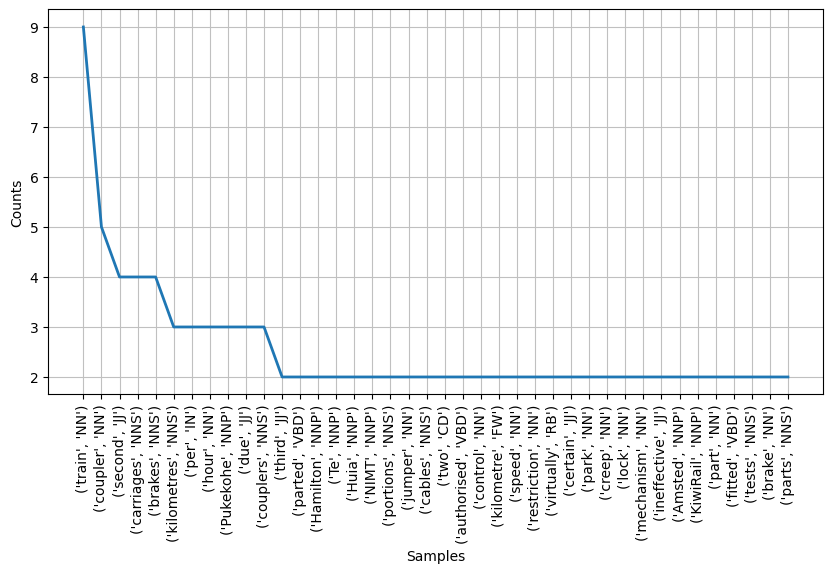

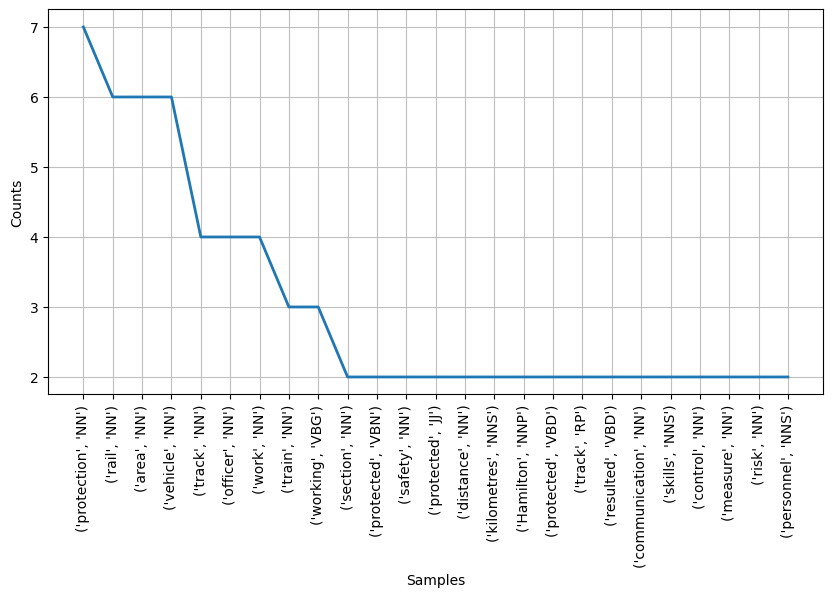

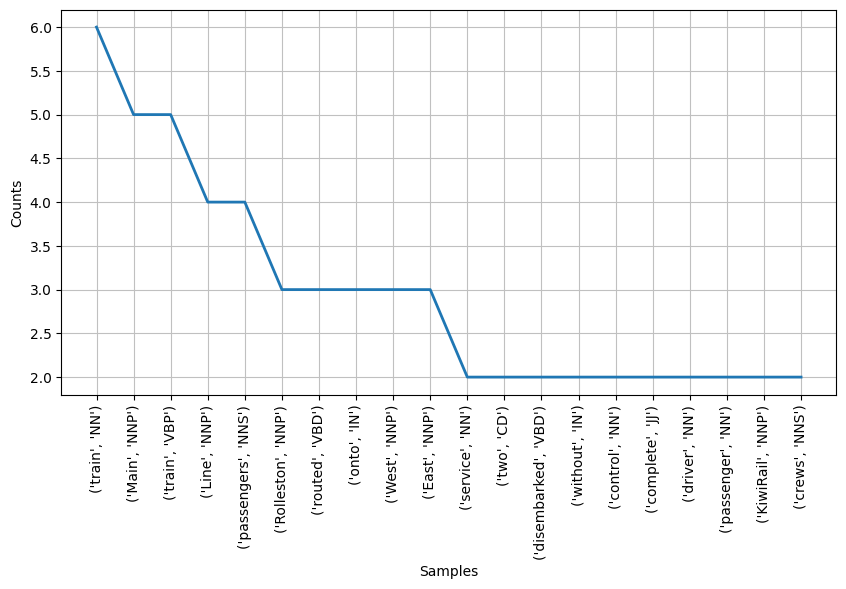

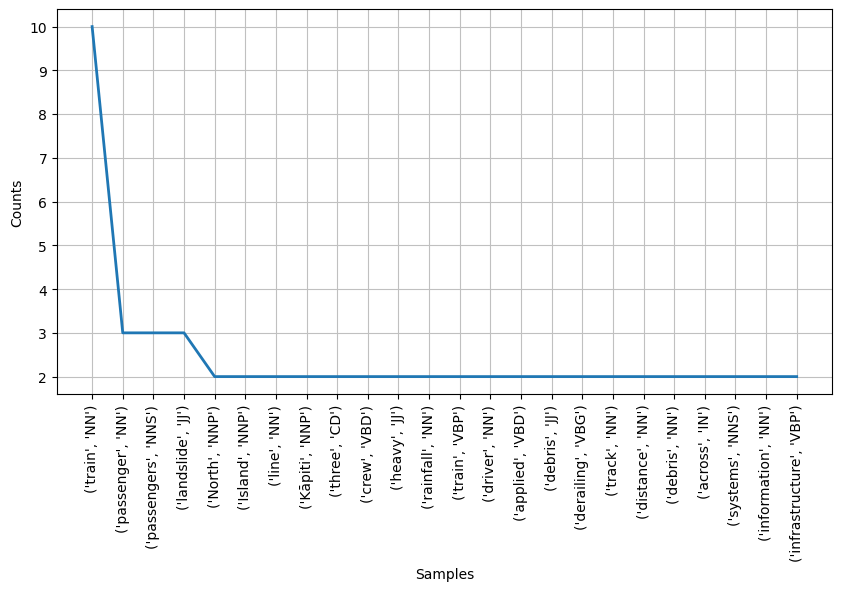

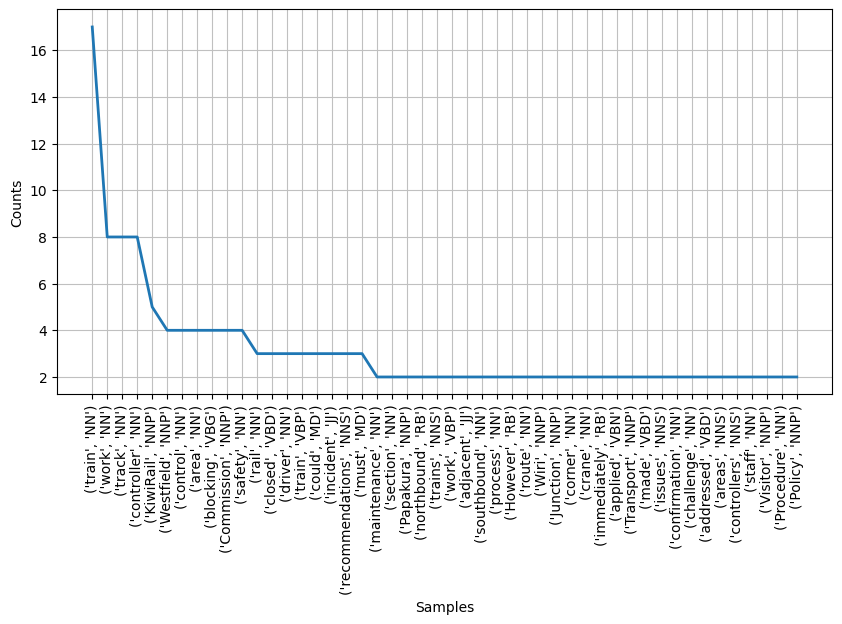

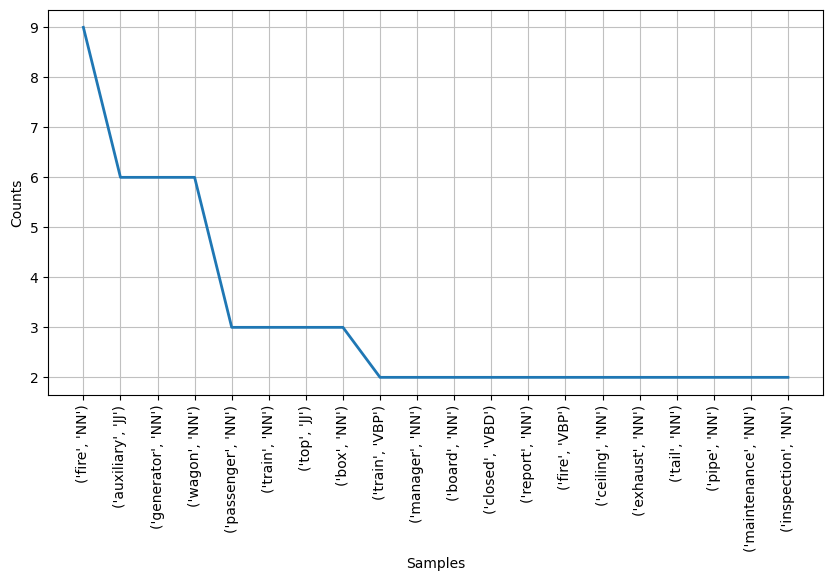

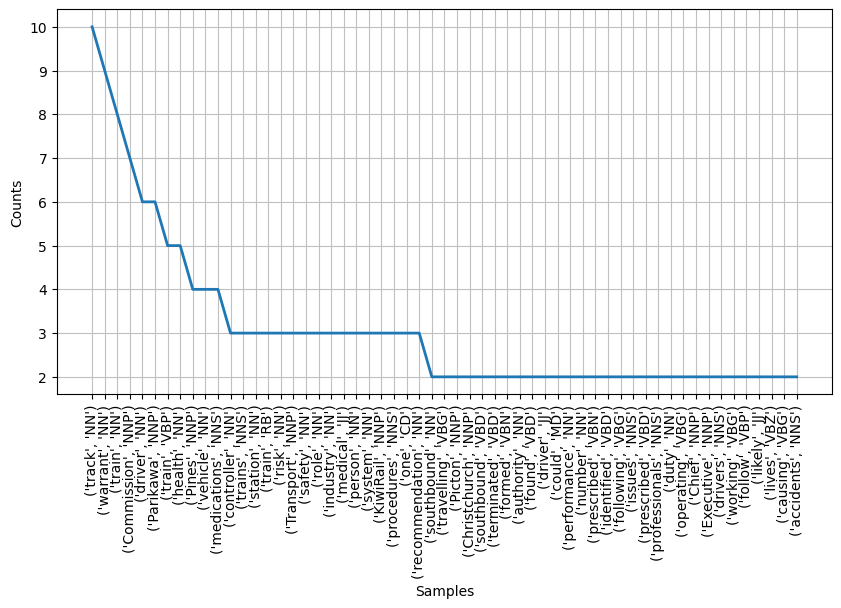

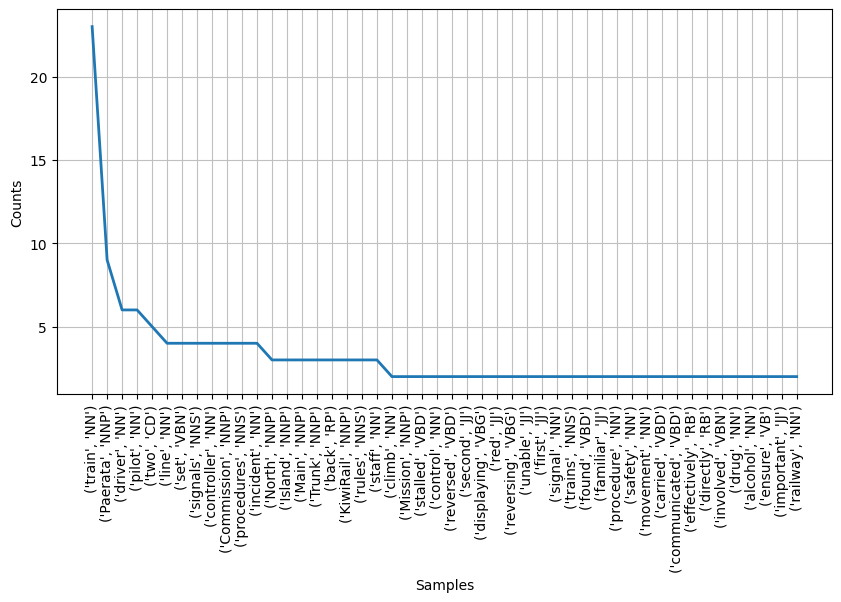

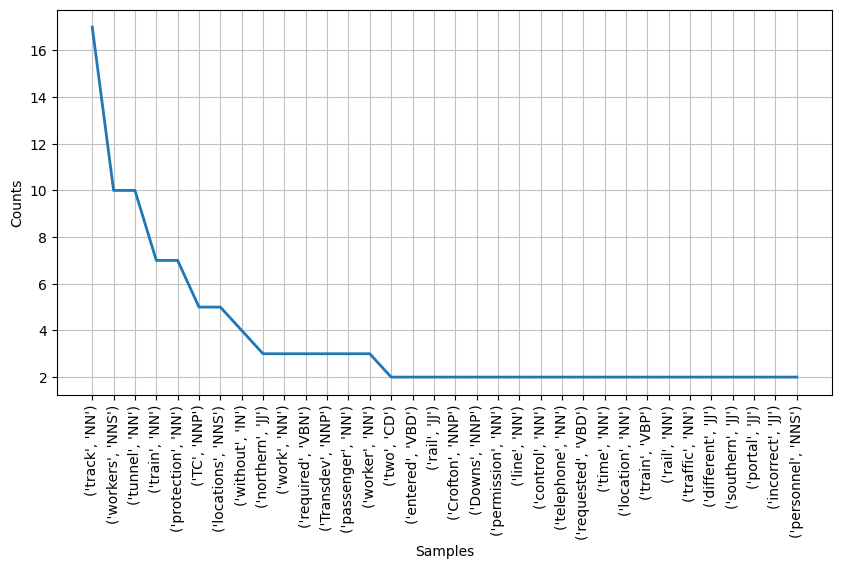

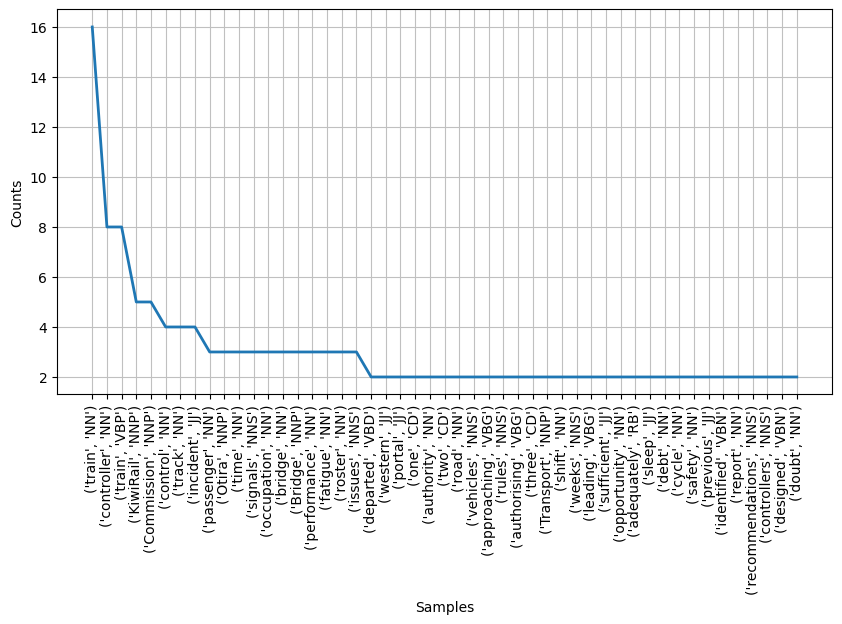

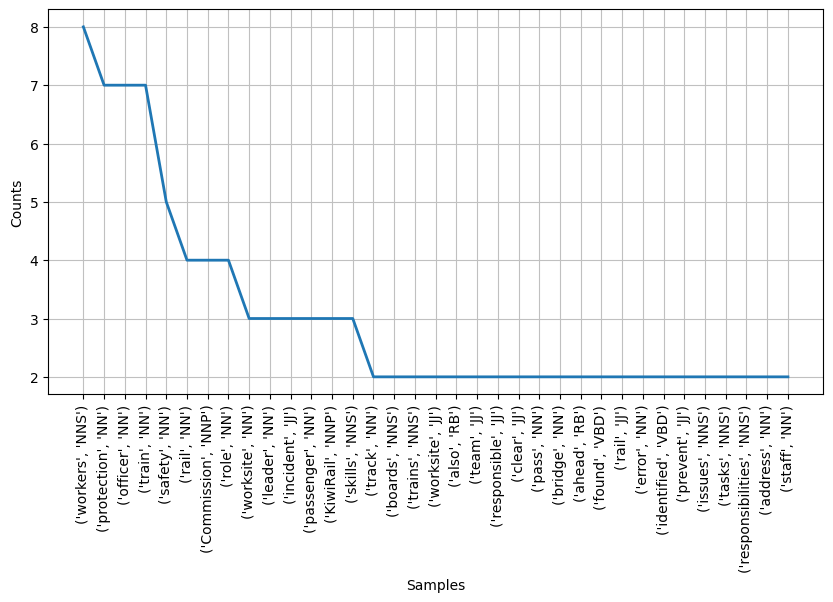

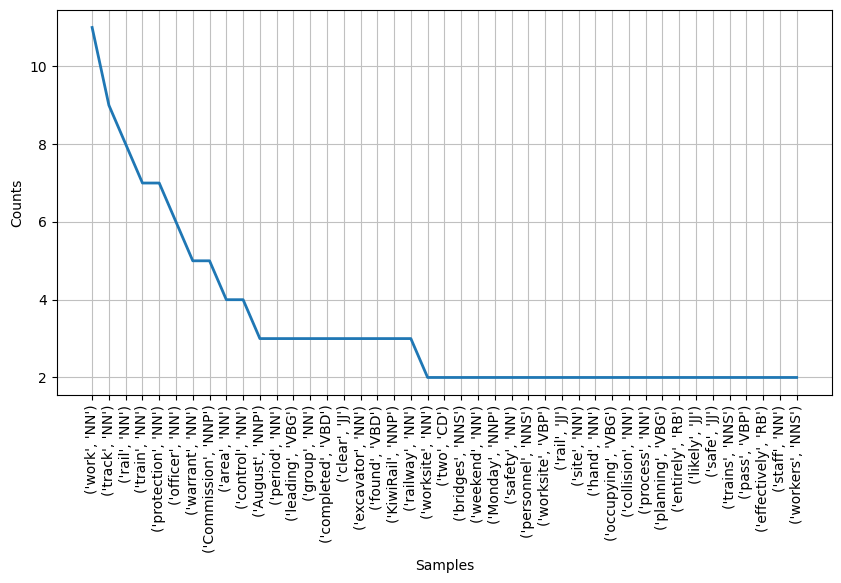

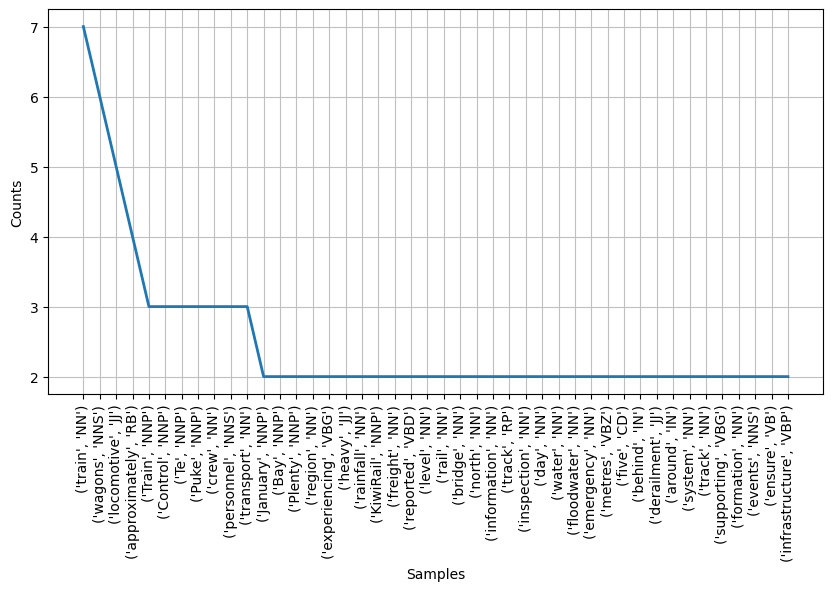

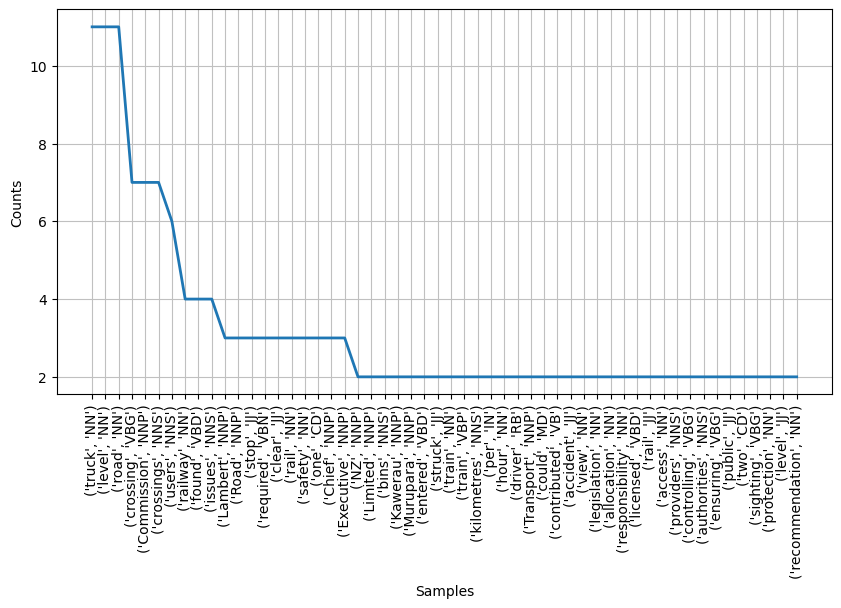

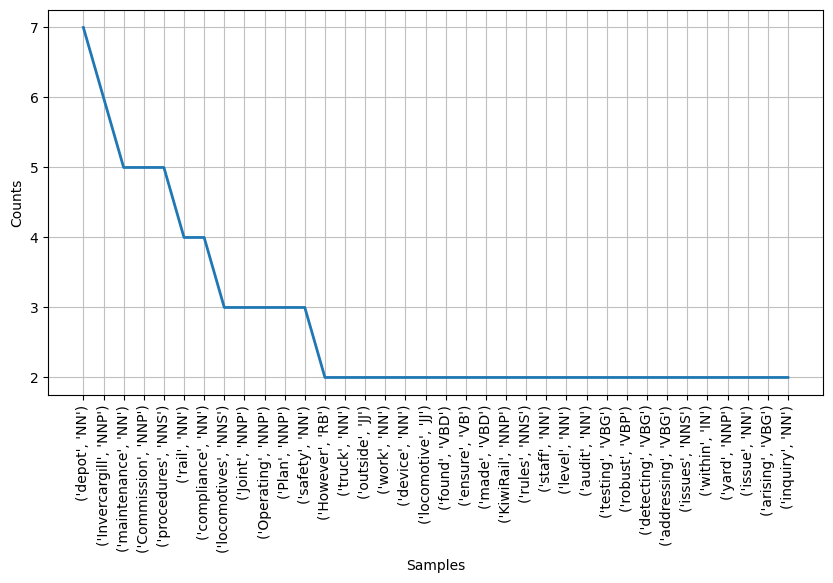

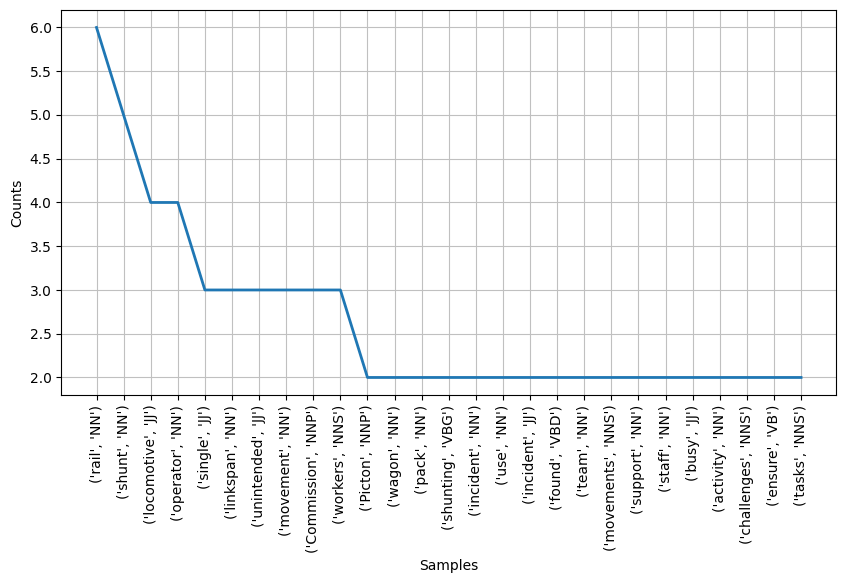

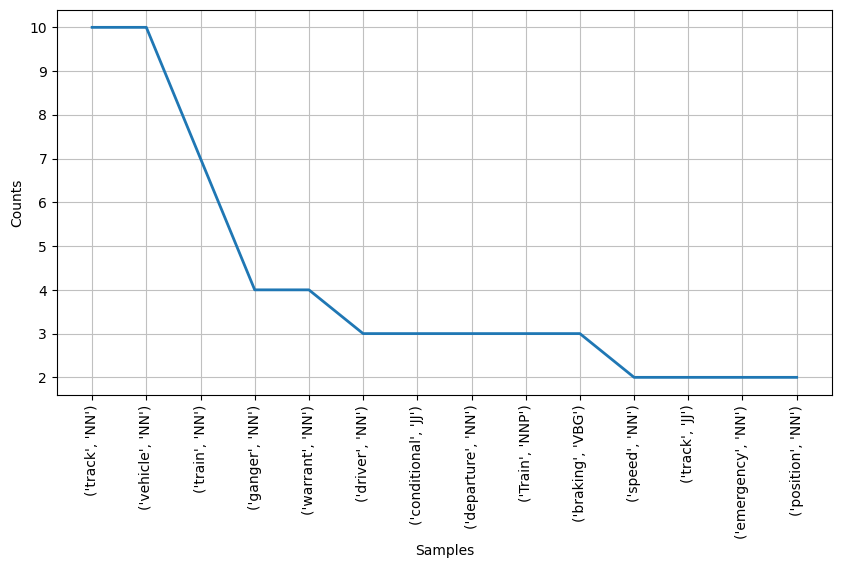

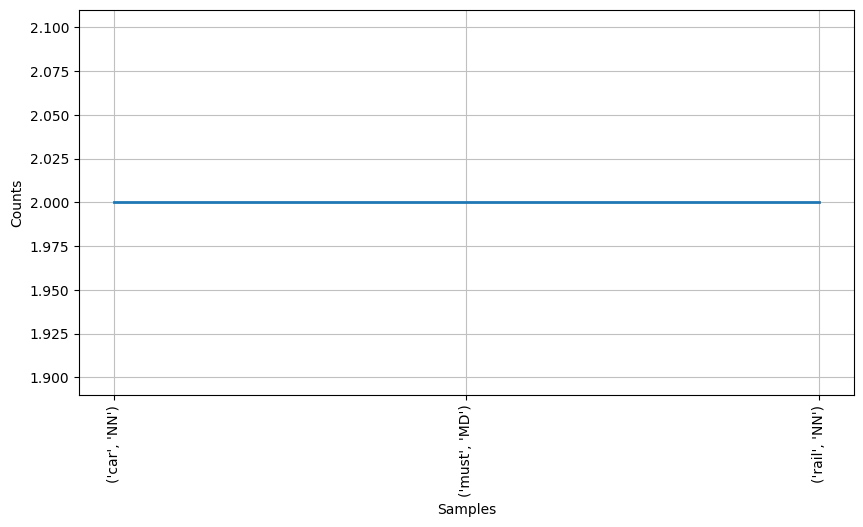

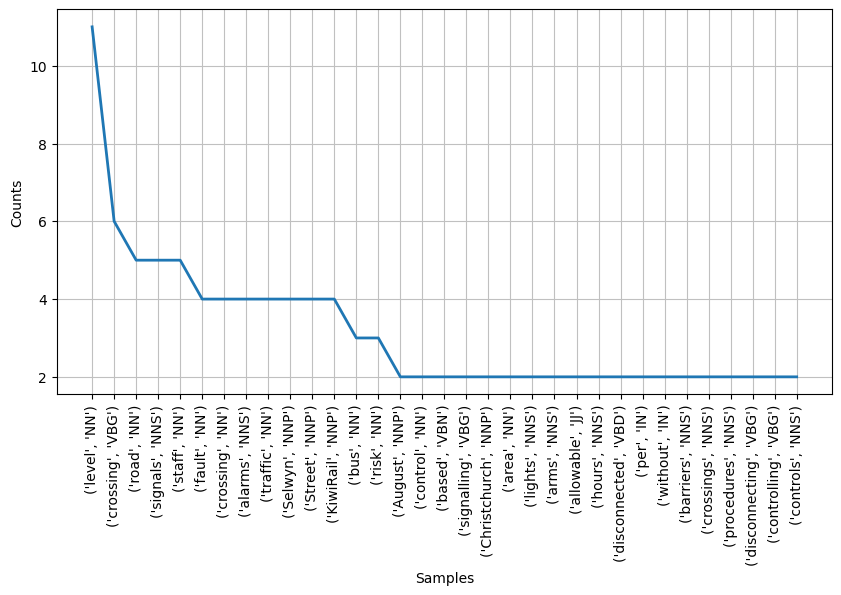

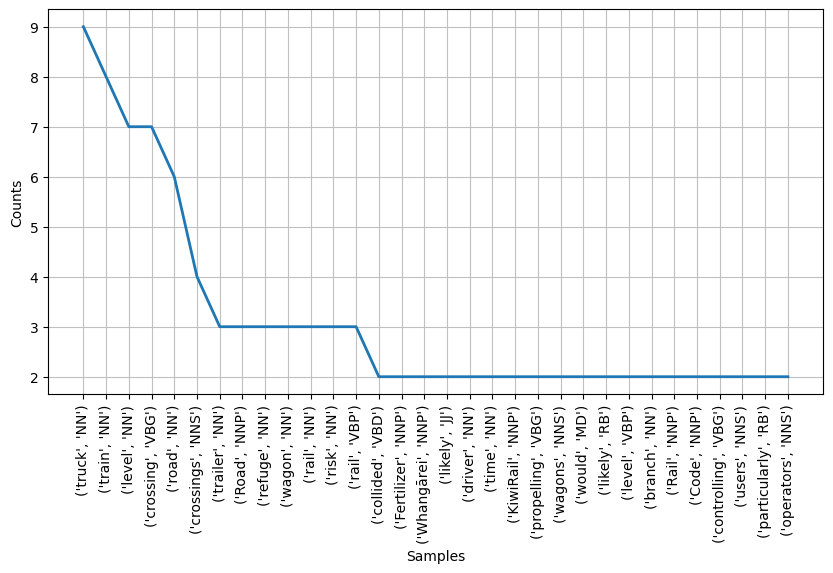

In [ ]:
for key in taic.keys(): #locations
  location = taic[key]
  for report in location.keys():
    t = location[report]
    text = ' '.join([token for token in nltk.word_tokenize(t) if (token.lower() not in nltk.corpus.stopwords.words('english'))])

    text_pos = nltk.pos_tag(nltk.word_tokenize(text))
    text_pos_fdist = nltk.FreqDist(text_pos)

    for hapaxe in text_pos_fdist.hapaxes():
      del text_pos_fdist[hapaxe]

    plt.figure(figsize = (10, 5))
    text_pos_fdist.plot()

    print(text_pos_fdist.most_common(10))

In [ ]:
# And for the corpus (english stopwords not included)

text = ' '.join([token for token in nltk.word_tokenize(corpus) if (token.lower() not in nltk.corpus.stopwords.words('english'))])
corpus_tokens = nltk.word_tokenize(text)

In [ ]:
corpus_pos = nltk.pos_tag(corpus_tokens)

[tagged for tagged in corpus_pos]

[('approximately', 'RB'),
 ('December', 'NNP'),
 ('train', 'NN'),
 ('collided', 'VBD'),
 ('truck', 'NN'),
 ('trailer', 'NN'),
 ('Fertilizer', 'NNP'),
 ('Road', 'NNP'),
 ('level', 'NN'),
 ('crossing', 'VBG'),
 ('near', 'IN'),
 ('Whangārei', 'NNP'),
 ('truck', 'NN'),
 ('crossing', 'VBG'),
 ('level', 'NN'),
 ('crossing', 'VBG'),
 ('train', 'NN'),
 ('refuge', 'NN'),
 ('wagon', 'NN'),
 ('collided', 'VBD'),
 ('truck', 'NN'),
 ('trailer', 'NN'),
 ('train', 'NN'),
 ('travelled', 'VBD'),
 ('another', 'DT'),
 ('metres', 'NNS'),
 ('came', 'VBD'),
 ('complete', 'JJ'),
 ('stop', 'NN'),
 ('train', 'NN'),
 ('refuge', 'NN'),
 ('wagon', 'NN'),
 ('derailed', 'VBD'),
 ('truck', 'NN'),
 ('trailer', 'NN'),
 ('tipped', 'VBD'),
 ('onto', 'IN'),
 ('side', 'NN'),
 ('rail', 'NN'),
 ('operator', 'NN'),
 ('propelled', 'VBD'),
 ('refuge', 'NN'),
 ('wagon', 'NN'),
 ('sustained', 'VBD'),
 ('moderate', 'JJ'),
 ('injuries', 'NNS'),
 ('fell', 'VBD'),
 ('ground', 'RB'),
 ('locomotive', 'JJ'),
 ('engineer', 'NN'),
 ('tru

In [ ]:
# And corpus bigrams

corpus_bigrams = [bigram for bigram in nltk.bigrams(corpus_pos)]

corpus_bigrams

[(('approximately', 'RB'), ('December', 'NNP')),
 (('December', 'NNP'), ('train', 'NN')),
 (('train', 'NN'), ('collided', 'VBD')),
 (('collided', 'VBD'), ('truck', 'NN')),
 (('truck', 'NN'), ('trailer', 'NN')),
 (('trailer', 'NN'), ('Fertilizer', 'NNP')),
 (('Fertilizer', 'NNP'), ('Road', 'NNP')),
 (('Road', 'NNP'), ('level', 'NN')),
 (('level', 'NN'), ('crossing', 'VBG')),
 (('crossing', 'VBG'), ('near', 'IN')),
 (('near', 'IN'), ('Whangārei', 'NNP')),
 (('Whangārei', 'NNP'), ('truck', 'NN')),
 (('truck', 'NN'), ('crossing', 'VBG')),
 (('crossing', 'VBG'), ('level', 'NN')),
 (('level', 'NN'), ('crossing', 'VBG')),
 (('crossing', 'VBG'), ('train', 'NN')),
 (('train', 'NN'), ('refuge', 'NN')),
 (('refuge', 'NN'), ('wagon', 'NN')),
 (('wagon', 'NN'), ('collided', 'VBD')),
 (('collided', 'VBD'), ('truck', 'NN')),
 (('truck', 'NN'), ('trailer', 'NN')),
 (('trailer', 'NN'), ('train', 'NN')),
 (('train', 'NN'), ('travelled', 'VBD')),
 (('travelled', 'VBD'), ('another', 'DT')),
 (('another', 

In [ ]:
corpus_pos_fdist = nltk.FreqDist(corpus_pos)

In [ ]:
corpus_pos_fdist.most_common(10)

[(('truck', 'NN'), 9),
 (('train', 'NN'), 8),
 (('level', 'NN'), 7),
 (('crossing', 'VBG'), 7),
 (('road', 'NN'), 6),
 (('crossings', 'NNS'), 4),
 (('trailer', 'NN'), 3),
 (('Road', 'NNP'), 3),
 (('refuge', 'NN'), 3),
 (('wagon', 'NN'), 3)]

<Axes: xlabel='Samples', ylabel='Counts'>

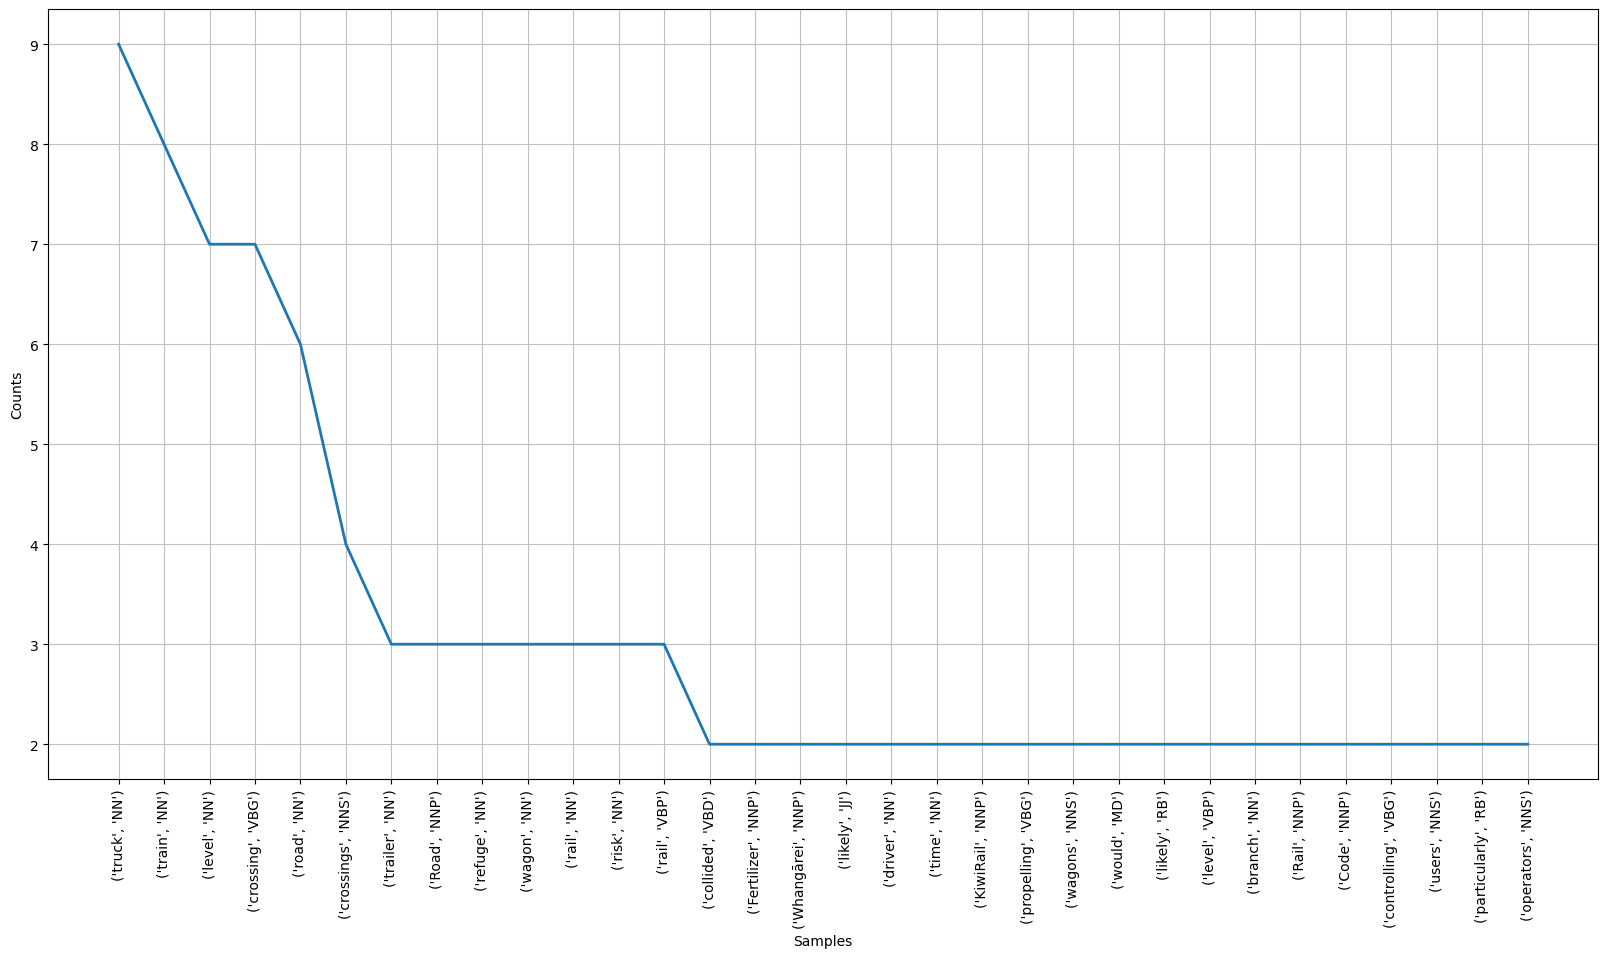

In [ ]:
plt.figure(figsize = (20, 10))

for hapaxe in corpus_pos_fdist.hapaxes():
  del corpus_pos_fdist[hapaxe]

corpus_pos_fdist.plot()

This has surprisingly cut the number of modal words (when taking word definition into account, and before considering coverage), recalling back to the 100+ words with a frequency >1000.

Lexical Sophistication
- Calculating a Frequency Profile
  - AoA Measurements
  - Word Concreteness Rating
  - Semantic Diversity Rating
    - coverage and comparison

The meat and potatoes here looks like it would be more in the emotional, interpretive side of analysis.

What tone would would expect these reports to have?

Personally, I predict average lexical sophistication, as these should be written where all people, from executive to member of the public should be able to comprehend the contents.

I would expect similar in terms of readability, appealing to executives, rail workers and the general public.

In terms of sentiment and emotion analysis, I believe the reports would have a moral alignment to stay as neutral and to the facts as possible, so I would expect a centric score for those measures, if not a slightly more negative lean given the subject matter.

In [ ]:
# borrowing your helper function <|:-)

import requests

def get_word_rating_resource(url):

  # read raw text, split on newlines
  raw = requests.get(url).text.split('\n')

  # split each pair, convert val to rounded float
  # if statement there to avoid indexing errors
  raw_list = [(pair.split('\t')[0], round(float(pair.split('\t')[1]), 3)) for pair in raw if len(pair.split('\t')) == 2]

  return dict(raw_list)

In [ ]:
freq_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/subtlxus_frequency.txt'
freq_dict = get_word_rating_resource(freq_url)

aoa_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/AoA_Brysbart.txt'
aoa_dict = get_word_rating_resource(aoa_url)

concrete_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/concreteness.txt'
concrete_dict = get_word_rating_resource(concrete_url)

semd_dict = get_word_rating_resource(semd_url)
semd_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/semantic_diversity.txt'

lexical_dictionaries = {'Frequency': freq_dict,
                        'Age of Acquisition': aoa_dict,
                        'Concreteness': concrete_dict, 'Semantic Diversity': semd_dict}


In [ ]:
def get_metric(text, dictionary):
  metric = []

  tokens = nltk.word_tokenize(text)

  for token in tokens:
    if token in dictionary.keys():
      metric.append(dictionary[token])

  coverage = len(metric) / len(tokens)

  return metric, coverage

In [ ]:
from collections import defaultdict

def lexical_profile(location, dictionaries):
  output = defaultdict(lambda: defaultdict(dict))

  for key in location.keys():
    text = location[key]
    for dictionary in dictionaries:
      metric, coverage = get_metric(text, dictionaries[dictionary])
      metric_average = round(sum(metric)/len(metric), 2)
      output[key][dictionary]['metric'] = metric_average
      output[key][dictionary]['coverage'] = round(coverage,2)
  return output

In [ ]:
for key in taic.keys(): #locations
  location = taic[key]

  profile = lexical_profile(location, lexical_dictionaries)

  print(profile)

# I struggled to format this nicely, but the idea is to average the profiles of each location, then print.

[6.177, 3.789, 5.771, 3.091, 2.79, 6.177, 2.173, 2.41, 5.46, 2.346, 6.018, 3.197, 5.857, 3.944, 3.383, 3.397, 5.834, 3.647, 2.586, 6.018, 2.685, 1.491, 3.686, 2.299, 5.017, 2.173, 6.063, 5.411, 2.581, 2.798, 5.834, 3.385, 5.698, 1.518, 1.518, 5.411, 6.018, 3.121, 5.857, 2.041, 2.54, 6.177, 2.348, 5.771, 5.55, 6.177, 4.082, 5.46, 5.268, 1.851, 5.771, 3.606, 5.834, 5.268, 1.851, 4.607, 6.177, 3.606, 1.623, 5.834, 2.464, 2.582, 4.928, 1.949, 5.698, 6.177, 3.121, 5.834, 1.477, 4.251, 6.177, 2.538, 1.518, 4.928, 4.604, 5.55, 6.177, 3.454, 5.353, 3.602, 3.48, 6.177, 2.961, 3.023, 4.928, 4.239, 6.063, 3.113, 6.177, 2.798, 5.834, 3.385, 3.227, 6.063, 6.177, 3.686, 5.46, 2.045, 5.834, 2.579, 4.928, 2.888, 5.46, 3.441, 5.546, 2.581, 4.193, 4.251, 6.177, 2.879, 5.46, 2.926, 5.834, 6.177, 3.454, 2.149, 2.763, 2.775, 5.771, 6.177, 3.618, 6.024, 3.113, 2.799, 3.547, 6.177, 2.064, 5.834, 2.344, 6.018, 3.93, 2.961, 2.915, 1.623, 5.017, 6.018, 3.364, 2.74, 3.686, 5.46, 4.244, 6.063, 2.559, 6.177, 2.803

Readability Formulas

Use the CMU dictionary to get syllables
- Flesch-Kincaid Readability
  - Reading Ease
    - `206.835 - (1.015 * total words / total sentences) - (84.6 * total syllables / total words)`
  - Grade Level
    - `(0.39 * total words / total sentences) + (11.8 * total syllables / total words) - 15.59`
- Gunning Fog Readability
  - Gunning Fog Index
    - `0.4 * ((total words / total sentences) + 100 * (complex words / total words))`

In [ ]:
from nltk.corpus import cmudict

# create the dictionary
cmu = cmudict.dict()

def count_syllables(word, x=0):

    if word in cmu.keys():
      phones = cmu[word][0]
      vowel_sounds= [sound for sound in phones if sound[-1].isdigit()]
      syllables = len(vowel_sounds)

    else:
      vowels = "aeiouy"
      syllables = 0
      prev_char_is_vowel = False
      for char in word:
          if char in vowels:
              if not prev_char_is_vowel:
                  syllables += 1
              prev_char_is_vowel = True
          else:
              prev_char_is_vowel = False

    if(x==1):
      return syllables

In [ ]:
# Get Readability Metrics

def get_totals(text):
  tot_words = nltk.word_tokenize(text)
  tot_sents = nltk.sent_tokenize(text)

  syls = []
  for word in text:
    syl = count_syllables(word)
    syls.append(syl)

  tot_syls = sum(syls)

  return [tot_words, tot_sents, tot_syls]

In [ ]:
# Flesch-Kincaid Readability
# Reading Ease

def fk_reading(text):

  tots = get_totals(text)

  read = 206.835 - (1.015 * tots[0] / tots[1]) - (84.6 * tots[2] / tots[0])

  return read

In [ ]:
# Grade Level

def fk_grade(text):

    get_totals(text)

    grade = (0.39 * tots[0] / tots[1]) + (11.8 * tots[2] / tots[0]) - 15.59

    return grade

In [ ]:
# Gunning Fog Readability

def gunning_fog(text):

  get_totals(text, x=1)

  gun = 0.4 * ((tots[0] / tots[1]) + 100 * (tots[2] / tots[0]))

  return gun

In [ ]:
for key in taic.keys(): #locations
  location = taic[key]
  fr = []
  fg = []
  gf = []

  for text in location.keys():
    fkr = fk_reading(location[text])
    fkg = fk_grade(location[text])
    gfi = gunning_fog(location[text])

    fr.append(fkr)
    fg.append(fkg)
    gf.append(gfi)

  fr = sum(fr)/(len(fr))
  fg = sum(fg)/(len(fg))
  gf = sum(gf)/(len(gf))

  print(f'Flesch-Kincaid Reading Ease: {fr}')
  print(f'Flesch-Kincaid Grade Level: {fg}')
  print(f'Gunning Fog Index: {gf}')

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

Sorry it's late and there are errors I can't seem to fix at the moment.

The idea for the final project is to (firstly get these concepts working), but then to expand upon them a bit further. Originally the goal was to see the difference between the eras of New Zealand rail the Commission covers, but I would first like to have a working model. I think visuals will be useful to look into, particularly when looking at most common/shared high frequency word combinations.

Something to further look at in the final report would be grouping texts by bigrams. It could be interesting to see how long you can chain bigrams before you stop getting a match?

When I have a more digestable lexical profile and sentiment analysis, I would also like to look at what language the reports are trying to use to get the tone and nature of the incidents across (the Morrinsville report is regarding a death, but uses few and neutral words to describe the incident). Can we introduce different ways of writing reports to compel an emotional response, or provoke investigation & safety legislation in response to an event?

The Commission makes recommendations at the end of each report, is there a linear correlation between the language used in a report and the actions taken in repsonse?